In [95]:
from SquareBoard import Board
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
import copy


In [132]:
n = 25

B = Board(n, 1)


In [133]:

tree_segments = []
gem_tree_segments = []
peano_curve_segments = []
peano_matrix = np.empty((n,n,2))
for i in range(n):
    for j in range(n):
        move = B.move_array[i,j]
            
        place = np.array([i,j])

        if i != 0 or j!= 0:

            tree_segments.append([place, move])

            move_is_horiz = (move[0] == i)
            if move_is_horiz:
                shift = np.array([-0.5,0.5])
            else:
                shift = -np.array([-0.5,0.5])

            if i != 0 and j != 0:
                gem_tree_segments.append([move + shift, place + shift])    

for i in range(n-1):
    gem_tree_segments.append([(0.5 + i, n - 0.5), (i+1.5, n-0.5)])
    gem_tree_segments.append([(n - 0.5, 0.5 + i), (n-0.5, i+1.5)]) 

for line in np.array(tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
        
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([x,y])
            
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([y,x])
            
                
    else:
        x = line[0] + np.array((-0.25,-0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([y,x])

            
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([x,y])    
            
for line in np.array(gem_tree_segments):
    is_horiz = line[1,0] - line[0,0] == 0 
    
    if is_horiz:
                
        x = line[0] + np.array((-0.25,0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(x >= 0):
            peano_curve_segments.append([y,x])
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((0.25,-0.25))
        
        if np.all(x < n-0.5):
            peano_curve_segments.append([x,y])
            
                
    else:
        x = line[0] + np.array((0.25,-0.25))
        y = line[1] + np.array((-0.25,-0.25))
        
        if np.all(y >= 0):
            peano_curve_segments.append([x,y])
            
        x = line[0] + np.array((0.25,0.25))
        y = line[1] + np.array((-0.25,0.25))
        
        if np.all(y < n-0.5):
            peano_curve_segments.append([y,x])


In [135]:
def show_trees(tree_segments, gem_tree_segments, peano_curve_segments):

    segments = tree_segments+gem_tree_segments + peano_curve_segments
    color_list = ["blue" for i in tree_segments] + ["orange" for i in gem_tree_segments] + ["black" for i in peano_curve_segments]
    lc = mc.LineCollection(segments, colors=color_list, linewidths=1)
    fig, ax = pl.subplots()
    ax.add_collection(lc)
    ax.autoscale()
    ax.margins(0.1)

    plt.axis("equal")
    plt.show()

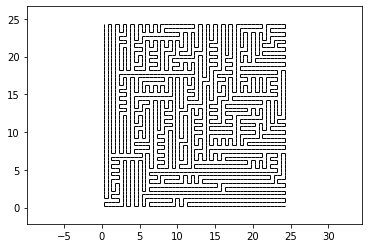

In [136]:
show_trees([],[], peano_curve_segments)

In [137]:
a = [1,2,3,5,6]
a.insert(-1,10,7,8)
print(a)


TypeError: insert expected 2 arguments, got 4

In [138]:
def add_path_seg(fragments, segment_real):
    segment = copy.deepcopy(segment_real)
        
    for a,path in enumerate(fragments):
            
        for i in (0,-1):
            for j in (0, -1):
                    
                if np.all(path[j] == segment[i]):
                        
                    ins_ind = 0
                    if j == - 1:
                        ins_ind = len(path)
                                
                    path_copy = copy.deepcopy(path)

                    if i == 0 and j == 0:
                        segment.reverse()
                        path_copy = segment + path_copy[1:]
                            
                    elif i == -1 and j == -1:
                        segment.reverse()
                        path_copy =  path_copy + segment[1:]
                        
                    elif i == 0 and j == -1:
                        path_copy = path_copy + segment[1:]
                        
                    elif i == -1 and j == 0:
                        path_copy = segment + path_copy[1:]

                    return add_path_seg(copy.deepcopy(fragments[:a] + fragments[a+1:]), path_copy)
                        
                    
    return fragments + [segment]


In [139]:
peano_path = []

for segment in copy.deepcopy(peano_curve_segments):
    peano_path = add_path_seg(peano_path, segment)

In [142]:
print(peano_path)

[[array([24.25,  0.25]), array([23.75,  0.25]), array([23.25,  0.25]), array([22.75,  0.25]), array([22.25,  0.25]), array([21.75,  0.25]), array([21.25,  0.25]), array([20.75,  0.25]), array([20.25,  0.25]), array([19.75,  0.25]), array([19.25,  0.25]), array([18.75,  0.25]), array([18.25,  0.25]), array([17.75,  0.25]), array([17.25,  0.25]), array([16.75,  0.25]), array([16.25,  0.25]), array([15.75,  0.25]), array([15.25,  0.25]), array([14.75,  0.25]), array([14.25,  0.25]), array([13.75,  0.25]), array([13.25,  0.25]), array([12.75,  0.25]), array([12.25,  0.25]), array([11.75,  0.25]), array([11.25,  0.25]), array([11.25,  0.75]), array([11.75,  0.75]), array([12.25,  0.75]), array([12.75,  0.75]), array([13.25,  0.75]), array([13.75,  0.75]), array([14.25,  0.75]), array([14.75,  0.75]), array([15.25,  0.75]), array([15.75,  0.75]), array([16.25,  0.75]), array([16.75,  0.75]), array([17.25,  0.75]), array([17.75,  0.75]), array([18.25,  0.75]), array([18.75,  0.75]), array([19